In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/titanic.csv")

In [4]:
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [5]:
df.isna().sum()

,0
survived,0
pclass,0
gender,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
deck,688


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   gender    891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
df.drop_duplicates()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [9]:
df['age'] = df['age'].fillna(df['age'].median())
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [10]:
df.isna().sum()

,0
survived,0
pclass,0
gender,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
deck,0


In [11]:
df.dropna()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,C
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,C
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,C
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,C
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,28.0,1,2,23.4500,S,C
889,1,1,male,26.0,0,0,30.0000,C,C


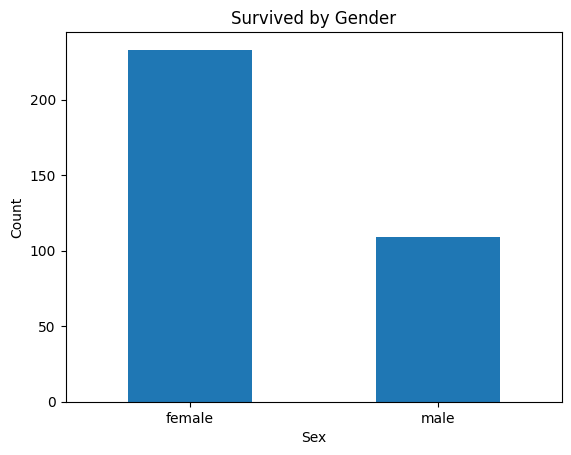

In [30]:
#Survived male and female
import matplotlib.pyplot as plt
df[df['survived'] == 1]['gender'].value_counts().plot(kind='bar')
plt.title('Survived by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
X=df.drop("survived",axis=1)
y=df["survived"]

In [13]:
X=pd.get_dummies(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=7)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
#conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
#print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       105
           1       0.72      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [20]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       105
           1       0.74      0.62      0.68        74

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
Y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7541899441340782
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       105
           1       0.74      0.62      0.68        74

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179

